In [1]:
#!/usr/bin/env python

'''
Graphene, a low dimensional PBC system

Here we compare the two methods of AFTDF and DF for this low-dimensional
PBC system.  The AFTDF integrates the non-periodic direction using gauss-
quadrature while the DF uses an analytic version of the fast-fourier transform
for this slab-like system.

Because of this, the fast-fourier transform method in the DF is generally
faster than the AFTDF, but requires many more reciprocal vectors in the
non-periodic direction.

'''

import time
from pyscf.pbc import df as pdf
from pyscf.pbc import gto as pbcgto
from pyscf.pbc import scf as pbchf

nk = 1
kpts = [nk,nk,1]
Lz = 25 # Smallest Lz value for ~1e-6 convergence in absolute energy
a = 1.42 # bond length in graphene
fft_ke_cut = 300
# Much smaller mesh needed for AFTDF with the setting cell.low_dim_ft_type='inf_vacuum'
aft_mesh = [30,30,40]
e = []
t = []
pseudo = 'gth-pade'

##################################################
#
# 2D PBC with AFT
#
##################################################
cell = pbcgto.Cell()
cell.build(unit = 'B',
           a = [[4.6298286730500005, 0.0, 0.0], [-2.3149143365249993, 4.009549246030899, 0.0], [0.0, 0.0, Lz]],
           atom = 'C 0 0 0; C 0 2.67303283 0',
           mesh = aft_mesh,
           dimension=2,
           low_dim_ft_type = 'inf_vacuum',
           pseudo = pseudo,
           verbose = 7,
           precision = 1e-6,
           basis='gth-szv')
t0 = time.time()
mf = pbchf.KRHF(cell)
mf.with_df = pdf.AFTDF(cell)
mf.kpts = cell.make_kpts(kpts)
mf.conv_tol = 1e-6
e.append(mf.kernel())
t.append(time.time() - t0)

##################################################
#
# 2D PBC with FFT
#
##################################################
cell = pbcgto.Cell()
cell.build(unit = 'B',
           a = [[4.6298286730500005, 0.0, 0.0], [-2.3149143365249993, 4.009549246030899, 0.0], [0.0, 0.0, Lz]],
           atom = 'C 0 0 0; C 0 2.67303283 0',
           ke_cutoff = fft_ke_cut,
           dimension=2,
           pseudo = pseudo,
           verbose = 7,
           precision = 1e-6,
           basis='gth-szv')
t0 = time.time()
mf = pbchf.KRHF(cell, exxdiv='ewald')
mf.with_df = pdf.FFTDF(cell)
mf.kpts = cell.make_kpts(kpts)
mf.conv_tol = 1e-6
e.append(mf.kernel())
t.append(time.time() - t0)

##################################################
#
# 2D PBC with GDF
#
##################################################
t0 = time.time()
mf = pbchf.KRHF(cell)
mf.with_df = pdf.GDF(cell)
mf.kpts = cell.make_kpts(kpts)
mf.conv_tol = 1e-6
e.append(mf.kernel())
t.append(time.time() - t0)

##################################################
#
# 2D PBC with MDF
#
##################################################
t0 = time.time()
mf = pbchf.KRHF(cell)
mf.with_df = pdf.MDF(cell)
mf.kpts = cell.make_kpts(kpts)
mf.conv_tol = 1e-6
e.append(mf.kernel())
t.append(time.time() - t0)

print('Energy (AFTDF) (FFTDF) (GDF)   (MDF)')
print(e)
print('Timing (AFTDF) (FFTDF) (GDF)   (MDF)')
print(t)

System: uname_result(system='Darwin', node='wireless-10-145-69-139.public.utexas.edu', release='23.5.0', version='Darwin Kernel Version 23.5.0: Wed May  1 20:19:05 PDT 2024; root:xnu-10063.121.3~5/RELEASE_ARM64_T8112', machine='x86_64')  Threads 8
Python 3.11.9 (main, Apr 19 2024, 11:44:45) [Clang 14.0.6 ]
numpy 1.26.4  scipy 1.13.1  h5py 3.12.1
Date: Tue Nov 26 19:46:24 2024
PySCF version 2.7.0
PySCF path  /Users/xinyuepeng/anaconda3/envs/hwenv/lib/python3.11/site-packages/pyscf

[CONFIG] ARGPARSE = False
[CONFIG] DEBUG = False
[CONFIG] MAX_MEMORY = 4000
[CONFIG] TMPDIR = /var/folders/f8/cqrkwd5d62jcqv67twtf1gxc0000gn/T
[CONFIG] UNIT = angstrom
[CONFIG] VERBOSE = 3
[CONFIG] conf_file = None
[INPUT] verbose = 7
[INPUT] max_memory = 4000 
[INPUT] num. atoms = 2
[INPUT] num. electrons = 8
[INPUT] charge = 0
[INPUT] spin (= nelec alpha-beta = 2S) = 0
[INPUT] symmetry False subgroup None
[INPUT] Mole.unit = B
[INPUT] Symbol           X                Y                Z      unit          X

WARNING!
  Size of vacuum may not be enough. The recommended vacuum size is 20.36054653096037 AA (38.47585668997836 Bohr)



fft_jk: get_k_kpts max_memory 4000  blksize 8
    CPU time for get_k_kpts: make_kpt (0,*)      3.43 sec, wall time      0.80 sec
mesh for ewald [ 7  7 27]
Ewald components = 0.0148415307232674, -0.19610468507593, -0.273766927069468
    CPU time for vj and vk      7.17 sec, wall time      1.39 sec
E1 = 25.376980708812027  E_coul = -18.944155510199
init E= -13.4578196240664
    CPU time for initialize scf      9.51 sec, wall time      1.96 sec
HOMO = -0.496991130902  LUMO = 0.106077379954
     k-point                  mo_energy
   0 ( 0.000  0.000  0.000)   [-2.15423133 -0.93354683 -0.49699113 -0.49699113] [0.10607738 0.10607738 0.20063358 0.26983135]
fft_jk: get_k_kpts max_memory 4000  blksize 8
    CPU time for get_k_kpts: make_kpt (0,*)      1.90 sec, wall time      0.31 sec
mesh for ewald [ 7  7 27]
Ewald components = 0.0148415307232674, -0.19610468507593, -0.273766927069468
    CPU time for vj and vk      5.62 sec, wall time      0.86 sec
E1 = 25.564120658261576  E_coul = -16.369546

<class 'pyscf.pbc.df.mdf.MDF'> does not have attributes  time_reversal_symmetry


    CPU time for ft_ao kernel initialization      0.01 sec, wall time      0.01 sec
max_memory 4000 (MB)  blocksize 15957
    CPU time for int2c2e      0.21 sec, wall time      0.04 sec
cond = -1.252e+06, drop 54 bfns
make_cderi for [0. 0. 0.]
kpt_ij_idx = [0]
memory = 0
int3c2e [1/1], AO [0:4], ncol = 36
    CPU time for ft_ao intor GTO_ft_ovlp      1.87 sec, wall time      0.36 sec
    CPU time for pass2: AFT int3c2e      2.33 sec, wall time      0.45 sec
    CPU time for j3c      2.92 sec, wall time      0.64 sec
    CPU time for Init get_k_kpts      2.94 sec, wall time      0.65 sec
get_k_kpts: build K from symm mo coeff
get_k_kpts: rank(dm) = 8 / 8
    CPU time for get_k_kpts: make_kpt ki>=kj (0,*)      0.01 sec, wall time      0.00 sec
    CPU time for buf1       0.00 sec, wall time       0.00 sec
    CPU time for ct11       0.00 sec, wall time       0.00 sec
    CPU time for ct12       0.00 sec, wall time       0.00 sec
    CPU time for buf2       0.00 sec, wall time       0.00 

Graphene volume: 104.8167866708382


******** <class 'pyscf.pbc.dft.rks.RKS'> ********
method = RKS
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
diis_damp = 0
SCF conv_tol = 1e-07
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /var/folders/f8/cqrkwd5d62jcqv67twtf1gxc0000gn/T/tmp2n1s47vc
max_memory 4000 MB (current use 0 MB)
******** PBC SCF flags ********
kpt = [0. 0. 0.]
Exchange divergence treatment (exxdiv) = ewald
Ewald components = 0.017886015064508, -0.208797500090022, 0.795105828268166
    madelung (= occupied orbital energy shift) = -1.2083886864853048
    Total energy shift due to Ewald probe charge = -1/2 * Nelec*madelung = 4.83355474594
DF object = <pyscf.pbc.df.fft.FFTDF object at 0x16bb4b1d0>
XC functionals = LDA,VWN
small_rho_cutoff = 1e-07
Uniform grid, mesh = [ 45  45 351]
Set gradient conv threshold to 0.000316

/Users/xinyuepeng/anaconda3/envs/hwenv/lib/python3.11/site-packages/ase/dft/kpoints.py:405: UserWarning: Please do not use (kpts, x, X) = bandpath(...).  Use path = bandpath(...) and then kpts = path.kpts and (x, X, labels) = path.get_linear_kpoint_axis().
  warnings.warn('Please do not use (kpts, x, X) = bandpath(...).  '


nelec by numeric integration = 7.9999999987451575
    CPU time for vxc      3.72 sec, wall time      0.51 sec
Building PBC AO integrals incore
    CPU time for vj and vk      5.07 sec, wall time      1.19 sec
Ewald components = 4.32069005593024, -7.31468693743995, 50.8561890478015
E1 = -111.03250537303883  Ecoul = 54.17333531251133  Exc = -3.1853207211364194
init E= -12.1822986153721
    CPU time for initialize scf     13.41 sec, wall time      2.56 sec
  HOMO = -0.571613056269569  LUMO = -0.113088771624935
  mo_energy =
[-1.10057575 -0.605655   -0.605655   -0.57161306 -0.11308877 -0.11308877
 -0.0232757   0.12028326]


/Users/xinyuepeng/anaconda3/envs/hwenv/lib/python3.11/site-packages/pyscf/pbc/gto/cell.py:127: UserWarning: Function cell.dumps drops attribute a because it is not JSON-serializable
  warnings.warn(msg)


nelec by numeric integration = 7.9999999994589395
    CPU time for vxc      3.35 sec, wall time      0.45 sec
    CPU time for vj and vk      0.00 sec, wall time      0.00 sec
E1 = -110.76830932706685  Ecoul = 55.23579397589761  Exc = -3.3663727212015
cycle= 1 E= -11.0366959060789  delta_E= 1.15  |g|= 2.95e-13  |ddm|= 3.95
    CPU time for cycle= 1      3.38 sec, wall time      0.46 sec
  HOMO = -0.430109077516257  LUMO = 0.0552780114940152
  mo_energy =
[-0.981747   -0.50830057 -0.43010908 -0.43010908  0.05527801  0.05527801
  0.12894293  0.27498668]
nelec by numeric integration = 7.999999999458943
    CPU time for vxc      3.14 sec, wall time      0.42 sec
    CPU time for vj and vk      0.00 sec, wall time      0.00 sec
E1 = -110.76830932706689  Ecoul = 55.23579397589765  Exc = -3.366372721201501
cycle= 2 E= -11.0366959060789  delta_E=    0  |g|= 3.1e-13  |ddm|= 1.27e-12
    CPU time for cycle= 2      3.18 sec, wall time      0.43 sec
  HOMO = -0.430109077516252  LUMO = 0.0552780114

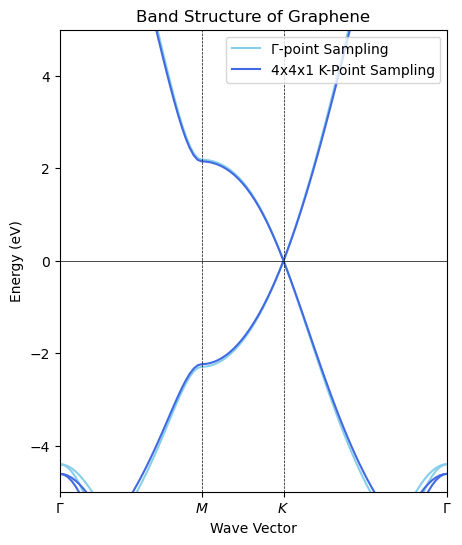

In [19]:
import pyscf.pbc.tools.pyscf_ase as pyscf_ase
import pyscf.pbc.gto as pbcgto
import pyscf.pbc.dft as pbcdft

import matplotlib.pyplot as plt
from ase.build import graphene
from ase.dft.kpoints import sc_special_points as special_points, get_bandpath

# Step 1: Build Graphene Structure
a = 2.46  # Lattice constant in Å
graphene_cell = graphene(formula="C2", a=a, size=(1, 1, 1), vacuum=10)
print("Graphene volume:", graphene_cell.get_volume())

# Step 2: Convert to PySCF Cell
cell = pbcgto.Cell()
cell.atom = pyscf_ase.ase_atoms_to_pyscf(graphene_cell)
cell.a = graphene_cell.cell  # Lattice vectors
cell.basis = 'gth-szv'
cell.pseudo = 'gth-pade'
cell.verbose = 5
cell.build(None, None)

# Step 3: Define Band Path
points = special_points['hexagonal']
G = points['G']
M = points['M']
K = points['K']
band_kpts, kpath, sp_points = get_bandpath([G, M, K, G], graphene_cell.cell, npoints=100)
band_kpts = cell.get_abs_kpts(band_kpts)

# Step 4: Perform Band Structure Calculation (Gamma Point Sampling)
mf = pbcdft.RKS(cell)
mf.kernel()

e_kn = mf.get_bands(band_kpts)[0]  # Band energies
vbmax = max(en[cell.nelectron // 2 - 1] for en in e_kn)  # Valence Band Maximum (VBM)
e_kn = [en - vbmax for en in e_kn]  # Align VBM to 0 eV

# Step 5: Periodic Sampling (K-Point Grid)
kmf = pbcdft.KRKS(cell, cell.make_kpts([4, 4, 1]))  # 4x4x1 grid for graphene
mf.xc = 'b3lyp'
kmf.kernel()

e_kn_2 = kmf.get_bands(band_kpts)[0]  # Band energies
vbmax = max(en[cell.nelectron // 2 - 1] for en in e_kn_2)  # Valence Band Maximum (VBM)
e_kn_2 = [en - vbmax for en in e_kn_2]  # Align VBM to 0 eV

# Step 6: Plot the Band Structure
au2ev = 27.21139  # Hartree to eV conversion
emin, emax = -5, 5  # Energy range in eV

plt.figure(figsize=(5, 6))
nbands = cell.nao_nr()
for n in range(nbands):
    plt.plot(kpath, [e[n] * au2ev for e in e_kn], color='#87CEEB', label="Γ-point Sampling" if n == 0 else "")
    plt.plot(kpath, [e[n] * au2ev for e in e_kn_2], color='#4169E1', label="4x4x1 K-Point Sampling" if n == 0 else "")
for p in sp_points:
    plt.axvline(p, color='k', linestyle='--', linewidth=0.5)
plt.axhline(0, color='k', linestyle='-', linewidth=0.5)
plt.xticks(sp_points, ['$%s$' % n for n in ['Γ', 'M', 'K', 'Γ']])
plt.axis(xmin=0, xmax=sp_points[-1], ymin=emin, ymax=emax)
plt.xlabel('Wave Vector')
plt.ylabel('Energy (eV)')
plt.title('Band Structure of Graphene')
plt.legend()
plt.show()

In [27]:
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display, clear_output
from ase.build import mx2, graphene
from ase.visualize import view
from ase.dft.kpoints import sc_special_points as special_points, get_bandpath
import pyscf.pbc.tools.pyscf_ase as pyscf_ase
import pyscf.pbc.gto as pbcgto
import pyscf.pbc.dft as pbcdft
import matplotlib.pyplot as plt

# Function to create and visualize different materials
def create_material(material, lattice_a, vacuum, basis, pseudo):
    # Build the material structure
    if material == 'Graphene':
        cell = graphene(formula="C2", a=lattice_a, size=(1, 1, 1), vacuum=vacuum)
    elif material in ['MoS2', 'WS2', 'MoSe2', 'WSe2']:
        cell = mx2(formula=material,kind = '2H', a=lattice_a, thickness=3.0, vacuum=vacuum)
    else:
        raise ValueError("Unsupported material")
    
    print(f"{material} Cell Volume: {cell.get_volume()} Å³")

    # Convert to PySCF Cell
    pyscf_cell = pbcgto.Cell()
    pyscf_cell.atom = pyscf_ase.ase_atoms_to_pyscf(cell)
    pyscf_cell.a = cell.cell
    pyscf_cell.basis = basis
    pyscf_cell.pseudo = pseudo
    pyscf_cell.verbose = 3
    pyscf_cell.build(None, None)

    # Visualize the material structure
    view(cell)
    return pyscf_cell

# Function to calculate total energy
def calculate_energy(cell,xc):
    mf = pbcdft.RKS(cell)
    mf.xc = xc
    energy = mf.kernel()
    print(f"Total Energy: {energy:.6f} Hartree")
    return mf
    
def calculate_bandstructure(cell, mf):
    points = special_points['hexagonal']
    G = points['G']
    M = points['M']
    K = points['K']
    band_kpts, kpath, sp_points = get_bandpath([G, M, K, G], cell.a, npoints=50)
    band_kpts = cell.get_abs_kpts(band_kpts)

    # Compute band energies
    e_kn = mf.get_bands(band_kpts)[0]
    vbmax = max(en[cell.nelectron // 2 - 1] for en in e_kn)  # Valence Band Maximum
    e_kn = [en - vbmax for en in e_kn]  # Align to VBM

    # Plot band structure
    au2ev = 27.21139  # Hartree to eV conversion
    plt.figure(figsize=(6, 6))
    nbands = cell.nao_nr()
    for n in range(nbands):
        plt.plot(kpath, [e[n] * au2ev for e in e_kn], color='#4169E1')
    for p in sp_points:
        plt.axvline(p, color='k', linestyle='--', linewidth=0.5)
    plt.axhline(0, color='k', linestyle='-', linewidth=0.5)
    plt.xticks(sp_points, ['$%s$' % n for n in ['Γ', 'M', 'K', 'Γ']])
    plt.xlabel('Wave Vector')
    plt.ylabel('Energy (eV)')
    plt.title('Band Structure')
    plt.grid()
    plt.show()

# Interactive function
def interactive_pyscf(material, lattice_a, vacuum, basis, pseudo,xc):
    clear_output(wait=True)
    print(f"Creating {material} cell...")
    cell = create_material(material, lattice_a, vacuum, basis, pseudo)
    print("\nCalculating total energy...")
    mf = calculate_energy(cell,xc)
    print("\nCalculating band structure...")
    calculate_bandstructure(cell, mf)

# Widget components
lattice_a_slider = widgets.FloatSlider(value=2.46, min=2.0, max=4.0, step=0.01, description='Lattice (a):')
vacuum_slider = widgets.FloatSlider(value=10.0, min=5.0, max=20.0, step=0.1, description='Vacuum:')
basis_dropdown = widgets.Dropdown(
    options=['gth-szv', 'gth-dzvp', 'gth-tzvp', 'cc-pvdz', 'sto-3g'],
    value='gth-szv',
    description='Basis Set:',
)
pseudo_dropdown = widgets.Dropdown(
    options=['gth-pade', 'gth-blyp', 'gth-pbe', 'gth-hf'],
    value='gth-pade',
    description='Pseudopotential:',
)
xc_dropdown = widgets.Dropdown(
    options=['lda,vwn', 'pbe', 'b88,lyp', 'pbe0','b3lyp','tpss'],
    value='lda,vwn',
    description='Exchange correlation functional:',
)
material_dropdown = widgets.Dropdown(
    options=['Graphene'],
    value='Graphene',
    description='Material:',
)

# Interactive display
ui = widgets.VBox([material_dropdown,lattice_a_slider, vacuum_slider, basis_dropdown, pseudo_dropdown,xc_dropdown])
out = widgets.Output()

interactive_display = widgets.interactive_output(
    interactive_pyscf,
    {
        'material' : material_dropdown,
        'lattice_a': lattice_a_slider,
        'vacuum': vacuum_slider,
        'basis': basis_dropdown,
        'pseudo': pseudo_dropdown,
        'xc' : xc_dropdown
    }
)

# Display interface
display(ui, out, interactive_display)


Output()

Output()

Graphene Cell Volume: 108.25317547305484 Å³


python(47136) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


converged SCF energy = -11.3083269384987
Total Energy: -11.308327 Hartree


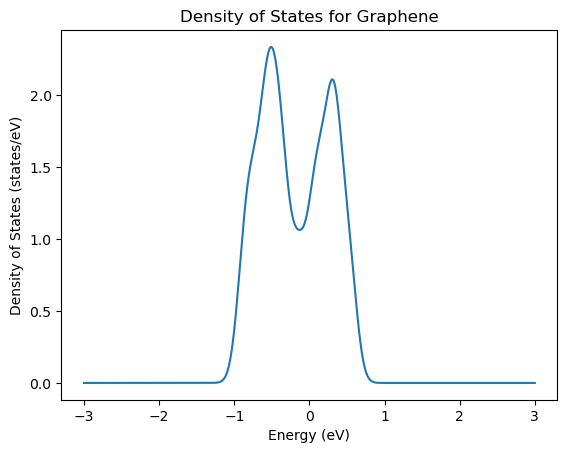

In [44]:
#Calculating Doensity of States

import numpy as np
import matplotlib.pyplot as plt
from pyscf.pbc import scf
from ase.build import mx2, graphene
from ase.visualize import view
from ase.dft.kpoints import sc_special_points as special_points, get_bandpath
import pyscf.pbc.tools.pyscf_ase as pyscf_ase
import pyscf.pbc.gto as pbcgto
import pyscf.pbc.dft as pbcdft
import matplotlib.pyplot as plt

# Function to create and visualize different materials
def create_material(material, lattice_a, vacuum, basis, pseudo):
    # Build the material structure
    if material == 'Graphene':
        cell = graphene(formula="C2", a=lattice_a, size=(1, 1, 1), vacuum=vacuum)
    elif material in ['MoS2', 'WS2', 'MoSe2', 'WSe2']:
        cell = mx2(formula=material,kind = '2H', a=lattice_a, thickness=3.0, vacuum=vacuum)
    else:
        raise ValueError("Unsupported material")
    
    print(f"{material} Cell Volume: {cell.get_volume()} Å³")

    # Convert to PySCF Cell
    pyscf_cell = pbcgto.Cell()
    pyscf_cell.atom = pyscf_ase.ase_atoms_to_pyscf(cell)
    pyscf_cell.a = cell.cell
    pyscf_cell.basis = basis
    pyscf_cell.pseudo = pseudo
    pyscf_cell.verbose = 3
    pyscf_cell.build(None, None)

    # Visualize the material structure
    view(cell)
    return pyscf_cell
cell = create_material('Graphene', 2.5, 10, 'gth-szv', 'gth-pade')
mf = dft.KRKS(cell, cell.make_kpts([4,4,1]))
mf.xc = 'pbe'  # Choose a suitable XC functional
energy = mf.kernel()
print(f"Total Energy: {energy:.6f} Hartree")
eigenvalues = mf.mo_energy

points = special_points['hexagonal']
G = points['G']
M = points['M']
K = points['K']
kpts, kpath, sp_points = get_bandpath([G, M, K, G], cell.a, npoints=50)
kpts = cell.get_abs_kpts(kpts)

# Parameters for DOS
energy_range = np.linspace(-3, 3, 1000)  # Energy grid (in eV)
smearing = 0.1  # Smearing width (in eV)

# Flatten eigenvalues and compute DOS
all_eigenvalues = np.array(eigenvalues).flatten()
dos = np.zeros_like(energy_range)

# Gaussian smearing for DOS
for e in all_eigenvalues:
    dos += np.exp(-((energy_range - e) ** 2) / (2 * smearing ** 2)) / (np.sqrt(2 * np.pi) * smearing)

# Normalize by k-point weights
dos /= len(kpts)

# Plot the DOS
plt.plot(energy_range, dos)
plt.xlabel("Energy (eV)")
plt.ylabel("Density of States (states/eV)")
plt.title("Density of States for Graphene")
plt.show()


Graphene Cell Volume: 108.25317547305484 Å³


python(47136) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


converged SCF energy = -11.3083269384987
Total Energy: -11.308327 Hartree


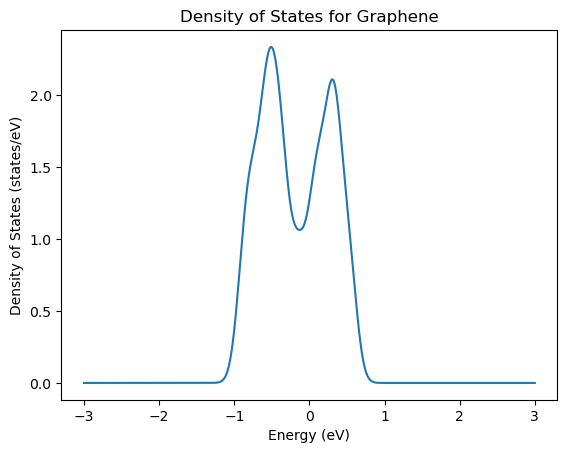

In [44]:
#Calculating Doensity of States

import numpy as np
import matplotlib.pyplot as plt
from pyscf.pbc import scf
from ase.build import mx2, graphene
from ase.visualize import view
from ase.dft.kpoints import sc_special_points as special_points, get_bandpath
import pyscf.pbc.tools.pyscf_ase as pyscf_ase
import pyscf.pbc.gto as pbcgto
import pyscf.pbc.dft as pbcdft
import matplotlib.pyplot as plt

# Function to create and visualize different materials
def create_material(material, lattice_a, vacuum, basis, pseudo):
    # Build the material structure
    if material == 'Graphene':
        cell = graphene(formula="C2", a=lattice_a, size=(1, 1, 1), vacuum=vacuum)
    elif material in ['MoS2', 'WS2', 'MoSe2', 'WSe2']:
        cell = mx2(formula=material,kind = '2H', a=lattice_a, thickness=3.0, vacuum=vacuum)
    else:
        raise ValueError("Unsupported material")
    
    print(f"{material} Cell Volume: {cell.get_volume()} Å³")

    # Convert to PySCF Cell
    pyscf_cell = pbcgto.Cell()
    pyscf_cell.atom = pyscf_ase.ase_atoms_to_pyscf(cell)
    pyscf_cell.a = cell.cell
    pyscf_cell.basis = basis
    pyscf_cell.pseudo = pseudo
    pyscf_cell.verbose = 3
    pyscf_cell.build(None, None)

    # Visualize the material structure
    view(cell)
    return pyscf_cell
cell = create_material('Graphene', 2.5, 10, 'gth-szv', 'gth-pade')
mf = dft.KRKS(cell, cell.make_kpts([4,4,1]))
mf.xc = 'pbe'  # Choose a suitable XC functional
energy = mf.kernel()
print(f"Total Energy: {energy:.6f} Hartree")
eigenvalues = mf.mo_energy

points = special_points['hexagonal']
G = points['G']
M = points['M']
K = points['K']
kpts, kpath, sp_points = get_bandpath([G, M, K, G], cell.a, npoints=50)
kpts = cell.get_abs_kpts(kpts)

# Parameters for DOS
energy_range = np.linspace(-3, 3, 1000)  # Energy grid (in eV)
smearing = 0.1  # Smearing width (in eV)

# Flatten eigenvalues and compute DOS
all_eigenvalues = np.array(eigenvalues).flatten()
dos = np.zeros_like(energy_range)

# Gaussian smearing for DOS
for e in all_eigenvalues:
    dos += np.exp(-((energy_range - e) ** 2) / (2 * smearing ** 2)) / (np.sqrt(2 * np.pi) * smearing)

# Normalize by k-point weights
dos /= len(kpts)

# Plot the DOS
plt.plot(energy_range, dos)
plt.xlabel("Energy (eV)")
plt.ylabel("Density of States (states/eV)")
plt.title("Density of States for Graphene")
plt.show()


converged SCF energy = -11.1114601185074


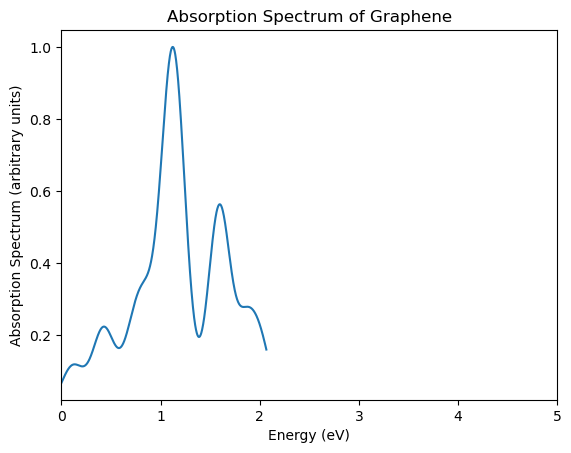

In [108]:
#calculate absorption spectrum 

from pyscf.pbc import gto, dft
import numpy as np
import matplotlib.pyplot as plt

# Define the graphene unit cell
cell = gto.Cell()
cell.atom = '''
C 0.0 0.0 0.0
C 0.0 1.23 0.0
'''
cell.a = [[2.46, 0, 0], [0, 2.46, 0], [0, 0, 20.0]]  # Lattice + vacuum for graphene
cell.basis = 'gth-szv'  # Basis set
cell.pseudo = 'gth-pade'  # Pseudopotentials
cell.build()

# Define k-point sampling (mesh size)
kmesh = [4, 4, 1]  # Sampling along the x and y axes
kpts = cell.make_kpts(kmesh)  # Create k-points grid

mf = dft.KRKS(cell, kpts)  # Use KRKS to handle k-points
mf.xc = 'pbe'  # Choose the exchange-correlation functional (e.g., PBE)
mf.kernel()  # Perform the DFT calculation

# Extract the eigenvalues and the transition dipoles
eigenvalues = np.array(mf.mo_energy) 
# Define the number of occupied and unoccupied states
n_occ = cell.nao-2  # Number of occupied states 
n_k = len(kpts)   # Number of k-points

# Separate occupied and unoccupied states
occupied_states = eigenvalues[:, :n_occ]  # Eigenvalues for occupied states 
unoccupied_states = eigenvalues[:, n_occ:]  # Eigenvalues for unoccupied states 
# Initialize an array for the absorption spectrum
absorption_spectrum = []

# Define the energy range for the absorption spectrum
emin = 0.00000000001  # Energy range from the minimum of occupied states
emax = np.max(unoccupied_states) - np.min(occupied_states)# Energy range from the maximum of unoccupied states
#energy_grid = np.linspace(emin, emax, 1000)  # Energy grid
energy_grid = np.linspace(0.00000001, np.max(eigenvalues)-np.min(eigenvalues), 1000)

# Define Gaussian broadening (standard deviation)
sigma = 0.1
absorption_spectrum = np.zeros_like(energy_grid)

# Loop over all occupied and unoccupied states for all k-points
for k in range(n_k):  # Loop over k-points
    for i in range(n_occ):  # Loop over occupied states
        for j in range(n_occ, eigenvalues.shape[1]):  # Loop over unoccupied states
            # Transition energy (difference between occupied and unoccupied states)
            transition_energy = unoccupied_states[k, j - n_occ] - occupied_states[k, i]
            
            # Apply Gaussian broadening
            absorption_spectrum += np.exp(-0.5 * ((energy_grid - transition_energy) / sigma) ** 2) / (sigma * np.sqrt(2 * np.pi))

# Normalize the absorption spectrum
absorption_spectrum /= np.max(absorption_spectrum)
wavelength = 1239.841984/energy_grid
# Plot the absorption spectrum
plt.plot(energy_grid, absorption_spectrum)
plt.xlabel('Energy (eV)')
plt.ylabel('Absorption Spectrum (arbitrary units)')
plt.title('Absorption Spectrum of Graphene')
plt.xlim(0,5)
plt.show()


In [116]:
from pyscf.pbc import gto, scf, dft
from pyscf import tdscf
import numpy as np
import matplotlib.pyplot as plt

# Define graphene unit cell
cell = gto.Cell()
cell.atom = '''
C 0.0 0.0 0.0
C 0.0 1.23 0.0
'''
cell.a = [[2.46, 0, 0], [0, 2.46, 0], [0, 0, 20.0]]  # Graphene lattice + vacuum
cell.basis = 'gth-szv'  # Minimal basis for efficiency
cell.pseudo = 'gth-pade'  # Use pseudopotential
cell.build()

# Define k-point sampling
kmesh = [4, 4, 1]  # Grid size for k-points
mf = dft.KRKS(cell, cell.make_kpts(kmesh))
mf.xc = 'pbe'  # Choose a suitable XC functional
mf.kernel()

# Convert periodic graphene into a supercell (approximation)
mf_mol = mf.to_mol()  # Approximate graphene as a molecular system
td = tdscf.TDDFT(mf_mol)
td.nstates = 10  # Number of excited states to calculate
excited_states = td.kernel()

# Extract oscillator strengths
for state, (energy, x_dip, y_dip, z_dip) in enumerate(td.oscillator_strength(), start=1):
    print(f"State {state}: Energy = {energy:.3f} eV, Oscillator Strength = {x_dip + y_dip + z_dip:.3f}")

# Example data from TDDFT
energies = [2.0, 2.5, 3.0]  # Excitation energies in eV
oscillator_strengths = [0.1, 0.3, 0.2]

# Generate the spectrum
energy_range = np.linspace(1.5, 4.0, 1000)
spectrum = np.zeros_like(energy_range)
broadening = 0.1  # Lorentzian width

for e, f in zip(energies, oscillator_strengths):
    spectrum += f * broadening / ((energy_range - e) ** 2 + broadening ** 2)

# Plot the spectrum
plt.plot(energy_range, spectrum, label="Absorption Spectrum")
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (arbitrary units)")
plt.legend()
plt.show()


converged SCF energy = -11.1114601185074


AttributeError: 'KRKS' object has no attribute 'to_mol'

In [118]:
cell = create_material('Graphene', 2.5, 10, 'gth-szv', 'gth-pade')

Graphene Cell Volume: 108.25317547305484 Å³


python(72235) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


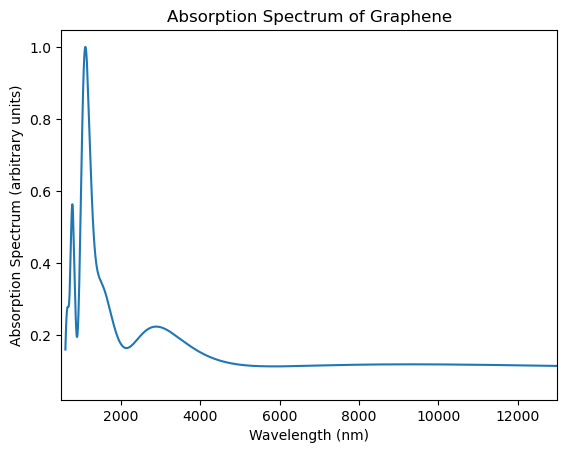

In [122]:
wavelength = 1239.841984/energy_grid
# Plot the absorption spectrum
plt.plot(wavelength, absorption_spectrum)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorption Spectrum (arbitrary units)')
plt.title('Absorption Spectrum of Graphene')
plt.xlim(500,13000)
plt.show()